In [1]:
# import required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("C:\\Users\\skalk\\Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

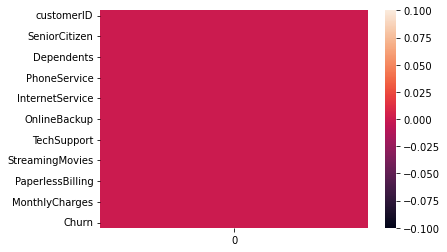

In [6]:
sns.heatmap(df.isnull().sum().to_frame())

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

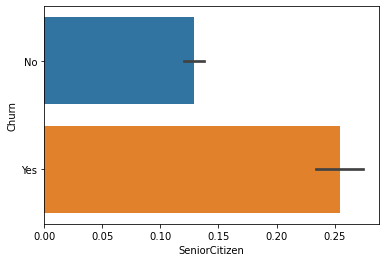

In [7]:
sns.barplot(x='SeniorCitizen',y='Churn',data=df)

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

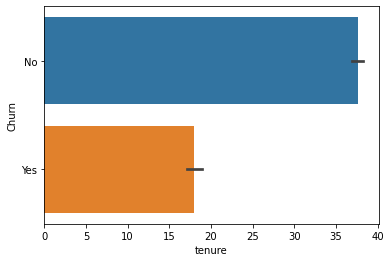

In [8]:
sns.barplot(x='tenure',y='Churn',data=df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

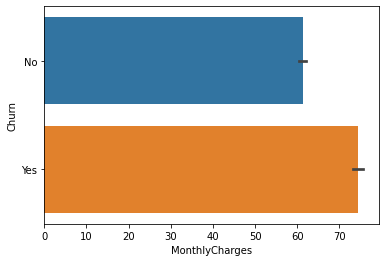

In [9]:
sns.barplot(x='MonthlyCharges',y='Churn',data=df)

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

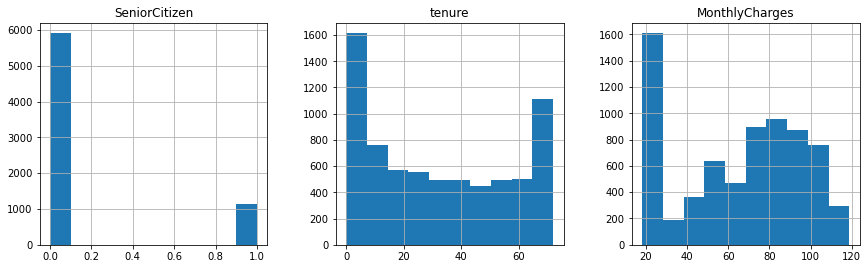

In [10]:
df.hist(figsize=(20,20),grid=True,layout=(4,4))

In [11]:
#convert the string labels to numerical values
label_encoder=LabelEncoder()
df['Churn']=label_encoder.fit_transform(df['Churn'])

In [12]:
#convert categorical features to numerical using one-hot encoding
df=pd.get_dummies(df)

In [13]:
#split the data into feature and label
x=df.drop('Churn',axis=1)
y=df['Churn']

In [14]:
#split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
#build and train the model
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [16]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for each model
lr_param_grid = {'C': [0.1, 1, 10]}

rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10]}

In [23]:
# Perform grid search for each model
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5)
lr_grid_search.fit(x_train, y_train)

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [24]:
# Get the best hyperparameters for each model
lr_best_params = lr_grid_search.best_params_
rf_best_params = rf_grid_search.best_params_

In [28]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict using the best models
lr_best_model = lr_grid_search.best_estimator_
rf_best_model = rf_grid_search.best_estimator_

lr_predictions = lr_best_model.predict(x_test)
rf_predictions = rf_best_model.predict(x_test)

In [30]:
# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)

In [32]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

In [35]:
# Print the evaluation metrics
print("Logistic Regression Model:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print()

print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print()

Logistic Regression Model:
Accuracy: 0.8161816891412349
Precision: 0.6826923076923077
Recall: 0.5710455764075067

Random Forest Model:
Accuracy: 0.7984386089425124
Precision: 0.6745098039215687
Recall: 0.46112600536193027



In [38]:
# Compare the performance of the models
model_names = ['Logistic Regression', 'Random Forest']
accuracy_scores = [lr_accuracy, rf_accuracy]
precision_scores = [lr_precision, rf_precision]
recall_scores = [lr_recall, rf_recall]
model_comparison_df = pd.DataFrame({'Model': model_names,
                                    'Accuracy': accuracy_scores,
                                    'Precision': precision_scores,
                                    'Recall': recall_scores,
                                    })

print("Model Comparison:")
print(model_comparison_df)
print()

Model Comparison:
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.816182   0.682692  0.571046
1        Random Forest  0.798439   0.674510  0.461126

